In [1]:
import json
from dataframe import *
with open("../yelp/yelp_academic_dataset_review.json") as f:
    raw = f.read()
df = as_dataframe(raw)

In [2]:
df.head(3)

,business_id,date,review_id,stars,text,type,user_id,votes
0,5UmKMjUEUNdYWqANhGckJw,2012-08-01,Ya85v4eqdd6k9Od8HbQjyA,4,"Mr Hoagie is an institution. Walking in, it do...",review,PUFPaY9KxDAcGqfsorJp3Q,"{u'funny': 0, u'useful': 0, u'cool': 0}"
1,5UmKMjUEUNdYWqANhGckJw,2014-02-13,KPvLNJ21_4wbYNctrOwWdQ,5,Excellent food. Superb customer service. I mis...,review,Iu6AxdBYGR4A0wspR9BYHA,"{u'funny': 0, u'useful': 0, u'cool': 0}"
2,5UmKMjUEUNdYWqANhGckJw,2015-10-31,fFSoGV46Yxuwbr3fHNuZig,5,Yes this place is a little out dated and not o...,review,auESFwWvW42h6alXgFxAXQ,"{u'funny': 1, u'useful': 1, u'cool': 0}"


In [3]:
df.ix[:"stars"].describe()

,stars
count,2.685066e+06
mean,3.764208e+00
std,1.390083e+00
min,1.000000e+00
25%,3.000000e+00
50%,4.000000e+00
75%,5.000000e+00
max,5.000000e+00


In [5]:
ts = df.set_index("date")

import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
subset2016only = ts["2016":]

# plt.plot(ts.index)

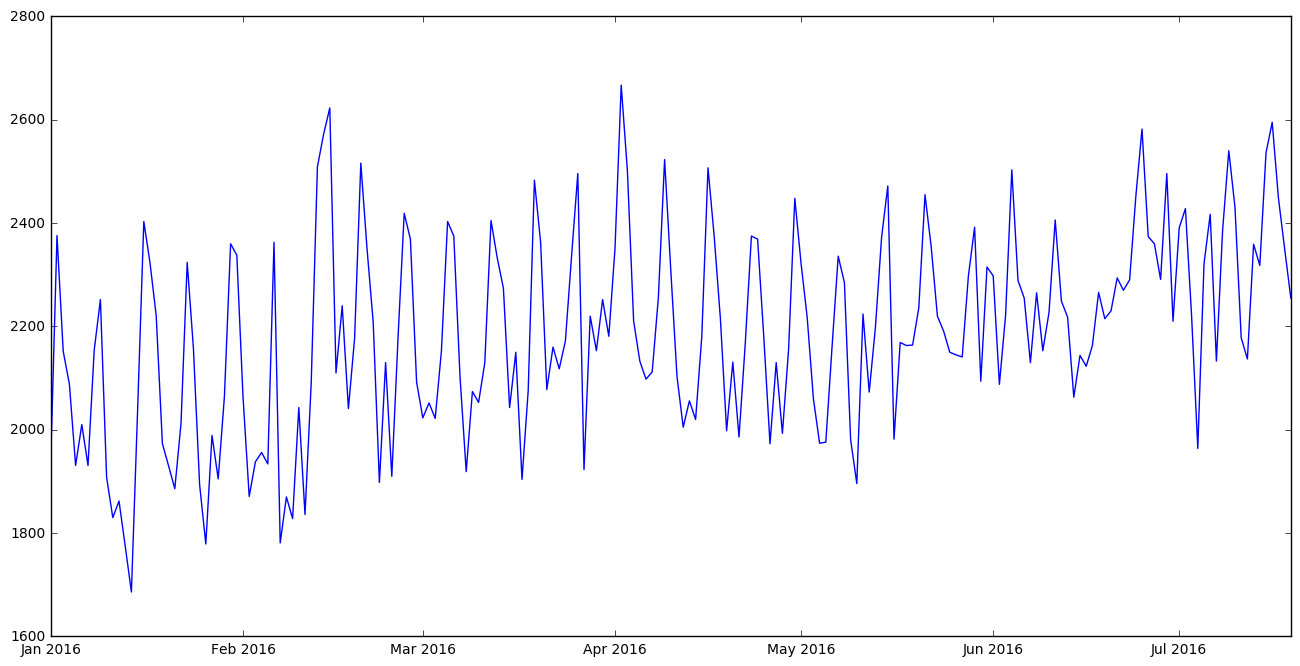

In [12]:
cnt = subset2016only.ix[:,"stars"].resample('D').count()
fig, ax1 = plt.subplots(figsize=(16, 8))
ax1.plot(cnt.index, cnt.values)

In [13]:
print(max(cnt.values))

2667


In [14]:
cnt[cnt.values == max(cnt.values)]

date
2016-04-02    2667
Freq: D, Name: stars, dtype: int64

('length of concat:', 1342906)


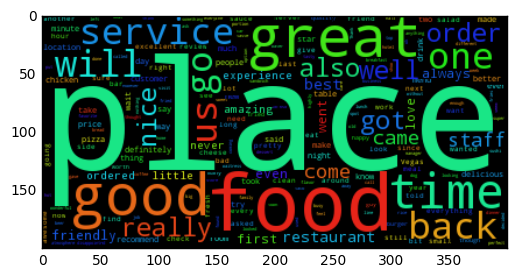

In [27]:
mydate = "2016-04-02"


allstrings = ts[mydate].ix[:,"text"].values


arr=[txt.strip("\n")  for txt in allstrings]
concat = ""
for txt in arr:
    concat += txt
print("length of concat:", len(concat))
import PIL
from wordcloud import WordCloud

wc = WordCloud().generate(concat)

plt.imshow(wc)